In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
pd.set_option('display.max_columns', 500)

https://www.svds.com/learning-imbalanced-classes/

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

https://towardsdatascience.com/one-common-misconception-about-random-forest-and-overfitting-47cae2e2c23b

https://neptune.ai/blog/evaluation-metrics-binary-classification

https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

In [ ]:
# To Import Data from google drive (authentication needed)
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd 
Data=pd.read_csv('gdrive/My Drive/Personal Data Science Projects/Customer Churn Prediction 2020/train.csv')
df_Test = pd.read_csv('gdrive/My Drive/Personal Data Science Projects/Customer Churn Prediction 2020/test.csv')
Test_Data_identifier = df_Test[['id']]
df_Test.drop( columns='id', inplace=True )

Mounted at /content/gdrive


**Data Features**:
***

state, string --> 2-letter code of the US state of customer residence <br>
account_length, numerical --> Number of months the customer has been with the current telco provider <br>
area_code --> string="area_code_AAA" where AAA = 3 digit area code.<br>
international_plan, (yes/no) --> The customer has international plan.<br>
voice_mail_plan, (yes/no) --> The customer has voice mail plan.<br>
number_vmail_messages, numerical --> Number of voice-mail messages.<br>
total_day_minutes, numerical.--> Total minutes of day calls.<br>
total_day_calls, numerical.--> Total number of day calls.<br>
total_day_charge, numerical. -->Total charge of day calls.<br>
total_eve_minutes, numerical.--> Total minutes of evening calls.<br>
total_eve_calls, numerical. -->Total number of evening calls.<br>
total_eve_charge, numerical. -->Total charge of evening calls.<br>
total_night_minutes, numerical. -->Total minutes of night calls.<br>
total_night_calls, numerical.--> Total number of night calls.<br>
total_night_charge, numerical. --> Total charge of night calls.<br>
total_intl_minutes, numerical. --> Total minutes of international calls.<br>
total_intl_calls, numerical.--> Total number of international calls.<br>
total_intl_charge, numerical.--> Total charge of international calls. <br>
number_customer_service_calls, numerical. --> Number of calls to customer service.<br>
churn, (yes/no).--> Customer churn - **target** variable.<br>




In [ ]:
target_churn = Data[['churn']]
df = Data.drop(columns='churn',axis=1).copy()
Data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
categorical_features_name = ['state','area_code','international_plan','voice_mail_plan']
numerical_features_name = list( set(df.columns.values) - set(categorical_features_name) )

In [ ]:
numerical_features_name

['total_eve_calls',
 'total_day_calls',
 'total_night_charge',
 'account_length',
 'total_night_calls',
 'total_eve_minutes',
 'total_day_minutes',
 'total_night_minutes',
 'total_intl_minutes',
 'total_intl_charge',
 'total_intl_calls',
 'total_eve_charge',
 'number_customer_service_calls',
 'number_vmail_messages',
 'total_day_charge']

In [ ]:
df['area_code'].unique() # Categorical Variable

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
df['state'].unique() # Categorical Variable

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

# Data Visualization

In [ ]:
import seaborn as sns

churn
no       3652
yes       598
dtype: int64
-----------------------------
Percentage of Churn Yes 14.070588235294117


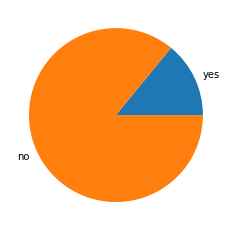

In [ ]:
yes_counts = target_churn.value_counts()['yes']
no_counts = target_churn.value_counts()['no']
plt.pie( [yes_counts, no_counts], labels=['yes','no'] )
print( target_churn.value_counts() )
print('-----------------------------')
print('Percentage of Churn Yes', yes_counts*100/target_churn.shape[0] )

#### Target Variable has Imbalanced Distribution

In [ ]:
fig = go.Figure()
fig.add_trace( go.Histogram( x = df['international_plan'] , name='international_plan' ) )
fig.add_trace( go.Histogram( x = df['voice_mail_plan'] , name='voice_mail_plan' ) )
fig.show()

In [ ]:
df_temp = df[['state','international_plan','voice_mail_plan']]

fig = go.Figure()
fig.add_trace( go.Histogram( x = df_temp[ df_temp['international_plan']=='no' ]['state'] , name='No International Plan' ) )
fig.add_trace( go.Histogram( x = df_temp[ df_temp['international_plan']=='yes' ]['state'] , name='Yes International Plan' ) )
fig.add_trace( go.Histogram( x = df_temp[ df_temp['voice_mail_plan']=='no' ]['state'] , name='No Voice Mail Plan' ) )
fig.add_trace( go.Histogram( x = df_temp[ df_temp['voice_mail_plan']=='yes' ]['state'] , name='Yes Voice Mail Plan' ) )

In [ ]:
fig = px.histogram( df, x='state', color='international_plan' )
fig.show()

In [ ]:
fig = px.histogram( df, x='state', color='voice_mail_plan' )
fig.show()

In [ ]:
from plotly.subplots import make_subplots

df_temp = df[['area_code','international_plan','voice_mail_plan']]
fig = make_subplots(rows=1,cols=2)

fig.add_trace( go.Histogram( x = df_temp[ df_temp['international_plan']=='no' ]['area_code'] , name='No International Plan' ), row=1, col=1 )
fig.add_trace( go.Histogram( x = df_temp[ df_temp['international_plan']=='yes' ]['area_code'] , name='Yes International Plan' ),row=1, col=1 )
fig.add_trace( go.Histogram( x = df_temp[ df_temp['voice_mail_plan']=='no' ]['area_code'] , name='No Voice Mail Plan' ), row=1, col=2 )
fig.add_trace( go.Histogram( x = df_temp[ df_temp['voice_mail_plan']=='yes' ]['area_code'] , name='Yes Voice Mail Plan' ),row=1, col=2 )

In [ ]:
def encoding_plan(df):
  df['international_plan'].replace( to_replace='no', value=0,inplace=True )
  df['international_plan'].replace( to_replace='yes', value=1,inplace=True )
  df['voice_mail_plan'].replace( to_replace='no', value=0, inplace=True )
  df['voice_mail_plan'].replace( to_replace='yes', value=1, inplace=True )
  return df

df = encoding_plan(df)
df_Test = encoding_plan(df_Test)

# Churn ---> 1 | Chrun ---> 0
def encoding_churn(df):
  df['churn'].replace( to_replace='yes', value=1, inplace=True )
  df['churn'].replace( to_replace='no', value=0, inplace=True )
  return df
target_churn = encoding_churn(target_churn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Unbalanced class, but one class if more important that the other. For e.g. in Fraud detection, it is more important to correctly label an instance as fraudulent, as opposed to labeling the non-fraudulent one. In this case, I would pick the classifier that has a good F1 score only on the important class. Recall that the F1-score is available per class.
<br>

* ## In this Churn "Yes" is more important to us so we will choose the model that provide high F1_Score for "Yes" ( i.e 1 as output )

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# def One_Hot_Encoder (df,feature):
#   ohe = OneHotEncoder(sparse=False,drop='first')
#   ohe.fit( df[[feature]] )
#   temp = ohe.transform( df[[feature]] )
#   temp = pd.DataFrame( temp )
#   df.drop(columns=feature,axis=1,inplace=True)
#   df = pd.concat( [df,temp],axis=1 )
#   return df

# df = One_Hot_Encoder(df,feature='area_code')

# df_Test = One_Hot_Encoder( df_Test, feature='area_code' )

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def One_Hot_Encoder (df,feature):
  ohe = OneHotEncoder(sparse=False,drop='first')
  ohe.fit( df[[feature]] )
  temp = ohe.transform( df[[feature]] )
  temp = pd.DataFrame( temp )
  df.drop(columns=feature,axis=1,inplace=True)
  df = pd.concat( [df,temp],axis=1 )
  return df, ohe

df, ohe = One_Hot_Encoder(df,feature='area_code')

df_Test, ohe_df_Test = One_Hot_Encoder( df_Test, feature='area_code' )

In [ ]:
df.columns.values

array(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 0, 1],
      dtype=object)

In [ ]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,0,1
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.496000,0.248471
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.500043,0.432177
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,1.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000


In [ ]:
# df = df.drop( columns = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'] )
# numerical_features_name = list( set(numerical_features_name) - set( ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'] ) )

# Dropping Highly Coorelated feature is decreasing models performance

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(columns='state')
df_Test = df_Test.drop( columns='state' )
y = target_churn
X_train, X_test, y_train ,y_test = train_test_split( X, y, test_size=0.2,  random_state=10, stratify=y ) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3400, 19), (3400, 1), (850, 19), (850, 1))

In [ ]:
numerical_features_name

['total_eve_calls',
 'total_day_calls',
 'total_night_charge',
 'account_length',
 'total_night_calls',
 'total_eve_minutes',
 'total_day_minutes',
 'total_night_minutes',
 'total_intl_minutes',
 'total_intl_charge',
 'total_intl_calls',
 'total_eve_charge',
 'number_customer_service_calls',
 'number_vmail_messages',
 'total_day_charge']

In [ ]:
i=0
X_num_train = X_train[numerical_features_name]
fig = make_subplots( rows=1, cols = X_num_train.shape[1],subplot_titles = X_num_train.columns.values )
for feature in X_num_train.columns.values:
  fig.add_trace( go.Histogram( x=X_num_train[feature]), row=1,col=i+1 )
  i = i+1

fig.update_layout( width=10000 )
fig.show()

In [ ]:
i=0
X_num_train = X_train[numerical_features_name]
fig = make_subplots( rows=1, cols = X_num_train.shape[1],subplot_titles = X_num_train.columns.values )
for feature in X_num_train.columns.values:
  fig.add_trace( go.Box( y=X_num_train[feature]), row=1,col=i+1 )
  i = i+1

fig.update_layout( width=5500, height=700 )
fig.show()

* Almost all features have outliers, so for scaling we will choose RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
RS.fit(X_train[numerical_features_name].values)
X_train[numerical_features_name] = RS.transform(X_train[numerical_features_name])
X_test[numerical_features_name] = RS.transform( X_test[numerical_features_name] )
df_Test[numerical_features_name] = RS.transform( df_Test[numerical_features_name] )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



In [ ]:
X_train[numerical_features_name].values

array([[ 0.33333333,  0.38461538,  0.56223539, ...,  2.        ,
         0.        , -0.35056543],
       [ 0.03703704, -1.03846154,  0.23708721, ...,  4.        ,
         0.        , -0.44668821],
       [ 0.48148148,  1.46153846,  1.50042337, ...,  1.        ,
         2.1875    , -0.72051696],
       ...,
       [-0.22222222,  0.84615385,  1.07366638, ...,  0.        ,
         0.        ,  0.12600969],
       [ 0.96296296, -0.23076923,  0.81964437, ...,  1.        ,
         1.625     ,  0.54765751],
       [-1.22222222,  0.        , -0.34208298, ...,  1.        ,
         0.        , -0.71324717]])

In [ ]:
# i=0
# X_num_train = X_train[numerical_features_name]
# fig = make_subplots( rows=1, cols = X_num_train.shape[1],subplot_titles = X_num_train.columns.values )
# for feature in X_num_train.columns.values:
#   fig.add_trace( go.Histogram( x=X_num_train[feature]), row=1,col=i+1 )
#   i = i+1

# fig.update_layout( width=10000 )
# fig.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
def Evaluation(model,X_train,X_test,y_train,y_test,grid=True):
  plt.figure(  figsize=(12,6) )
  print( "-----------------------------------------------------------------------------------------------------------")
  print( model )
  print( " For Train Set :  ")
  y_pred = model.predict(X_train)
  if grid==True:
    print("Param for GS", model.best_params_)
    print("CV score for GS", model.best_score_)

  print("F1_Score = ", f1_score(y_train, y_pred, average='macro'))
  print("AUC ROC Score for GS: ", roc_auc_score(y_train, y_pred))
  print( classification_report( y_train, y_pred ) )

  print( " For Test Set :  ")
  y_pred = model.predict(X_test)
  print("Test Set F1_Score = ", f1_score(y_test, y_pred, average='macro'))
  auc_score = roc_auc_score(y_test, y_pred )
  print("Test AUC ROC Score for GS: ", auc_score )
  print( classification_report( y_test, y_pred ) )
  print('------------------------------------------------------------------------------------------------------------')
  print("\n")

  fpr, tpr, thresh = roc_curve( y_test, y_pred )
  # plt.plot( fpr, tpr, label=model + str( auc_score ) ) 
  return

In [ ]:
def apply_models_with_default_paramters(X_train,X_test,y_train,y_test):
  models_default = [ RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier() , ExtraTreeClassifier(), KNeighborsClassifier(), RidgeClassifier(), SVC(), 
                     LogisticRegression(),AdaBoostClassifier(), SGDClassifier() ]

  for model in models_default:
    print(model)
    model.fit(X_train, y_train)

    Evaluation(model,X_train,X_test,y_train,y_test,False)

apply_models_with_default_paramters(X_train,X_test,y_train,y_test)

RandomForestClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



-----------------------------------------------------------------------------------------------------------
RandomForestClassifier()
 For Train Set :  
F1_Score =  1.0
AUC ROC Score for GS:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2922
           1       1.00      1.00      1.00       478

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400

 For Test Set :  
Test Set F1_Score =  0.8959192617034439
Test AUC ROC Score for GS:  0.8521118721461188
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       730
           1       0.97      0.71      0.82       120

    accuracy                           0.96       850
   macro avg       0.96      0.85      0.90       850
weighted avg       0.96      0.96      0.95       850

----------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       730
           1       0.69      0.72      0.70       120

    accuracy                           0.91       850
   macro avg       0.82      0.84      0.83       850
weighted avg       0.92      0.91      0.92       850

------------------------------------------------------------------------------------------------------------


XGBClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-----------------------------------------------------------------------------------------------------------
XGBClassifier()
 For Train Set :  
F1_Score =  0.9217387455181267
AUC ROC Score for GS:  0.8846143382047603
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2922
           1       0.98      0.77      0.86       478

    accuracy                           0.97      3400
   macro avg       0.97      0.88      0.92      3400
weighted avg       0.97      0.97      0.96      3400

 For Test Set :  
Test Set F1_Score =  0.8707333093890652
Test AUC ROC Score for GS:  0.8285388127853881
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       730
           1       0.92      0.67      0.77       120

    accuracy                           0.94       850
   macro avg       0.93      0.83      0.87       850
weighted avg       0.94      0.94      0.94       850

-------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:


F1_Score =  0.7641970713497043
AUC ROC Score for GS:  0.7038231107827218
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2922
           1       0.97      0.41      0.58       478

    accuracy                           0.92      3400
   macro avg       0.94      0.70      0.76      3400
weighted avg       0.92      0.92      0.90      3400

 For Test Set :  
Test Set F1_Score =  0.6736855575415581
Test AUC ROC Score for GS:  0.6299086757990867
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       730
           1       0.86      0.27      0.41       120

    accuracy                           0.89       850
   macro avg       0.88      0.63      0.67       850
weighted avg       0.89      0.89      0.86       850

------------------------------------------------------------------------------------------------------------


RidgeClassifier()
---------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Featu

-----------------------------------------------------------------------------------------------------------
SVC()
 For Train Set :  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



F1_Score =  0.8812571771637927
AUC ROC Score for GS:  0.8303921484396255
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2922
           1       0.98      0.66      0.79       478

    accuracy                           0.95      3400
   macro avg       0.96      0.83      0.88      3400
weighted avg       0.95      0.95      0.95      3400

 For Test Set :  
Test Set F1_Score =  0.7846757648737847
Test AUC ROC Score for GS:  0.7320205479452055
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       730
           1       0.88      0.47      0.62       120

    accuracy                           0.92       850
   macro avg       0.90      0.73      0.78       850
weighted avg       0.91      0.92      0.91       850

------------------------------------------------------------------------------------------------------------


LogisticRegression()
------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature n

-----------------------------------------------------------------------------------------------------------
AdaBoostClassifier()
 For Train Set :  
F1_Score =  0.7218783079046104
AUC ROC Score for GS:  0.6831345814038072
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2922
           1       0.70      0.39      0.50       478

    accuracy                           0.89      3400
   macro avg       0.81      0.68      0.72      3400
weighted avg       0.88      0.89      0.88      3400

 For Test Set :  
Test Set F1_Score =  0.7107964499268846
Test AUC ROC Score for GS:  0.6710045662100457
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       730
           1       0.71      0.37      0.48       120

    accuracy                           0.89       850
   macro avg       0.81      0.67      0.71       850
weighted avg       0.88      0.89      0.87       850

--------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature n

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

* With default parameters, best performance is given by RandomForestClassifier
* All the tree based models are overfitting 

In [ ]:
def applying_hypertuning_models( X_train,X_test,y_train,y_test ):
  # Decision Tree
  param_grid = { # 'n_estimators': [20,30,40,50,75,80,100],
                  "max_depth": [2,3,5,10,15,20,None],
                  "min_samples_split": [2,5,7,10],
                  "min_samples_leaf": [1,2,5] }  
  clf = DecisionTreeClassifier(random_state=10)
  grid_cv_DTC = RandomizedSearchCV(clf, param_grid, scoring="roc_auc",cv=10).fit(X_train, y_train.values.ravel())
  Evaluation( grid_cv_DTC,X_train,X_test,y_train,y_test )

  # Random Forest
  param_grid = { #'n_estimators': [50,75,100,200,500,1000],
                  'max_features': [4,6,8,10,12,14,16,18],
                  "max_depth": [2,3,5,10,15,20,None],
                  "min_samples_split": [2,5,7,10],
                  "min_samples_leaf": [1,2,5]  }
  clf = RandomForestClassifier(random_state=10)
  grid_cv_RFC = RandomizedSearchCV(clf, param_grid, scoring="roc_auc",cv=10, verbose=0).fit(X_train, y_train.values.ravel())
  Evaluation( grid_cv_RFC, X_train, X_test, y_train, y_test )
 
  # XGBClassifier
  param_grid = { "max_depth": [3, 4, 5, 7],
                  "learning_rate": [0.1, 0.01, 0.05],
                  "gamma": [0, 0.25, 1],
                  "reg_lambda": [0, 0.5, 1, 5 ,10],
                  "scale_pos_weight": [1, 3, 5],
                  "subsample": [0.8],
                  "colsample_bytree": [0.5] }
  clf = XGBClassifier(random_state=10,verbose=0)
  grid_cv_XGBC = RandomizedSearchCV(clf, param_grid, scoring="roc_auc",cv=10).fit(X_train, y_train.values.ravel())
  Evaluation( grid_cv_XGBC,X_train,X_test,y_train,y_test )

  # Logistic Regression
  param_grid = {'C': [0.1,0.5,1,10,50,100],
                'max_iter': [100,250,500],
                'fit_intercept':[True],
                'intercept_scaling':[1],
                'penalty':['l2'],
                'tol':[0.00001,0.0001,0.000001]}
  clf = LogisticRegression(random_state=10,verbose=0)
  grid_cv_LR = RandomizedSearchCV(clf, param_grid, scoring="roc_auc",cv=10).fit(X_train, y_train.values.ravel())
  Evaluation( grid_cv_LR,X_train,X_test,y_train,y_test )

  # Fit SVM with RBF Kernel
  param_grid = {'C': [0.5,100,150],
                'gamma': [0.1,0.01,0.001],
                'probability':[True],
                'kernel': ['rbf']}
  grid_cv_SVC = RandomizedSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=0)
  grid_cv_SVC.fit(X_train, y_train )
  Evaluation( grid_cv_SVC,X_train,X_test,y_train,y_test )
  return


In [ ]:
applying_hypertuning_models( X_train,X_test,y_train,y_test )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20,
                                                      None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 7, 10]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 5}
CV score for GS 0.8916840899838652
F1_Score =  0.8888358070251154
AUC ROC Score for GS:  0.862421566016284
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2922
           1       0.89      0.74      0.81       478

    accuracy                           0.95      3400
   macro avg       0.92      0.86      0.89      3400
weighted avg      

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20,
                                                      None],
                                        'max_features': [4, 6, 8, 10, 12, 14,
                                                         16, 18],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 7, 10]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': None}
CV score for GS 0.9116869844838884
F1_Score =  0.943054836575274
AUC ROC Score for GS:  0.9124954536212087
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2922
           1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=XGBClassifier(random_state=10, verbose=0),
                   param_distributions={'colsample_bytree': [0.5],
                                        'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [3, 4, 5, 7],
                                        'reg_lambda': [0, 0.5, 1, 5, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.8]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 0, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.25, 'colsample_bytree': 0.5}
CV score for GS 0.9146731116387127
F1_Score =  0.9489952526350529
AUC ROC Score for GS:  0.9184100418410042
              prec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=10),
                   param_distributions={'C': [0.1, 0.5, 1, 10, 50, 100],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'max_iter': [100, 250, 500],
                                        'penalty': ['l2'],
                                        'tol': [1e-05, 0.0001, 1e-06]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 500, 'intercept_scaling': 1, 'fit_intercept': True, 'C': 10}
CV score for GS 0.8176201238233413
F1_Score =  0.6100097497562561
AUC ROC Score for GS:  0.5868809407209483
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2922
           1       0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Fea

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.5, 100, 150],
                                        'gamma': [0.1, 0.01, 0.001],
                                        'kernel': ['rbf'],
                                        'probability': [True]})
 For Train Set :  
Param for GS {'probability': True, 'kernel': 'rbf', 'gamma': 0.01, 'C': 150}
CV score for GS 0.9255882352941176
F1_Score =  0.8879341046103781
AUC ROC Score for GS:  0.8468249808837301
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2922
           1       0.94      0.70      0.80       478

    accuracy                           0.95      3400
   macro avg       0.95      0.85      0.89      3400
weighted avg       0.95      0.95      0.95      3400

 For Test Set :  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Test Set F1_Score =  0.8016666666666667
Test AUC ROC Score for GS:  0.7605593607305935
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       730
           1       0.81      0.54      0.65       120

    accuracy                           0.92       850
   macro avg       0.87      0.76      0.80       850
weighted avg       0.91      0.92      0.91       850

------------------------------------------------------------------------------------------------------------




<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [ ]:
# -----------------------------------------------------------------------------------------------------------
# RandomizedSearchCV(cv=10, estimator=XGBClassifier(random_state=10, verbose=0),
#                    param_distributions={'colsample_bytree': [0.5],
#                                         'gamma': [0, 0.25, 1],
#                                         'learning_rate': [0.1, 0.01, 0.05],
#                                         'max_depth': [3, 4, 5, 7],
#                                         'reg_lambda': [0, 0.5, 1, 5, 10],
#                                         'scale_pos_weight': [1, 3, 5],
#                                         'subsample': [0.8]},
#                    scoring='roc_auc')
#  For Train Set :  
# Param for GS {'subsample': 0.8, 'scale_pos_weight': 3, 'reg_lambda': 0, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.25, 'colsample_bytree': 0.5}
# CV score for GS 0.9114758760717132
# F1_Score =  0.9287411450393468
# AUC ROC Score for GS:  0.9174993341523974
#               precision    recall  f1-score   support

#            0       0.98      0.99      0.98      2922
#            1       0.91      0.85      0.88       478

#     accuracy                           0.97      3400
#    macro avg       0.94      0.92      0.93      3400
# weighted avg       0.97      0.97      0.97      3400

#  For Test Set :  
# Test Set F1_Score =  0.9008873497277317
# Test AUC ROC Score for GS:  0.8925228310502283
#               precision    recall  f1-score   support

#            0       0.97      0.98      0.97       730
#            1       0.85      0.81      0.83       120

#     accuracy                           0.95       850
#    macro avg       0.91      0.89      0.90       850
# weighted avg       0.95      0.95      0.95       850

# ------------------------------------------------------------------------------------------------------------


* With hypertunner parameters, best performance is given by XGBClassifier and RandomForestClassifier but Overfitting in RandomForestClassifier is more as compared to XGBClassifier

In [ ]:
px.imshow( X_train.corr(),color_continuous_scale='RdBu_r', width=700, height=700 )

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3400, 19), (3400, 1), (850, 19), (850, 1))

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE( sampling_strategy='minority', random_state=10 )
X_train_smote , y_train_smote = smote.fit_resample( X_train, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
px.imshow( X_train_smote.corr(),color_continuous_scale='RdBu_r', width=700, height=700 )

* ### No Significant changes in coorelation among features after applying SMOTE Oversampling


In [ ]:
X_train_smote.shape, y_train_smote.shape, X_test.shape, y_test.shape

((5844, 19), (5844, 1), (850, 19), (850, 1))

In [ ]:
fig = go.Figure()
fig.add_trace( go.Histogram( x = y_train['churn'] , name='y_train' ) )
fig.add_trace( go.Histogram( x = y_train_smote['churn'] , name='y_train_smote' ) )
fig.show()

In [ ]:
apply_models_with_default_paramters(X_train_smote,X_test,y_train_smote,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()
-----------------------------------------------------------------------------------------------------------
RandomForestClassifier()
 For Train Set :  
F1_Score =  1.0
AUC ROC Score for GS:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2922
           1       1.00      1.00      1.00      2922

    accuracy                           1.00      5844
   macro avg       1.00      1.00      1.00      5844
weighted avg       1.00      1.00      1.00      5844

 For Test Set :  
Test Set F1_Score =  0.9008586270938569
Test AUC ROC Score for GS:  0.8827625570776255
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       730
           1       0.88      0.78      0.83       120

    accuracy                           0.95       850
   macro avg       0.92      0.88      0.90       850
weighted avg       0.95      0.95      0.95       850

---------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



-----------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
 For Train Set :  
F1_Score =  1.0
AUC ROC Score for GS:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2922
           1       1.00      1.00      1.00      2922

    accuracy                           1.00      5844
   macro avg       1.00      1.00      1.00      5844
weighted avg       1.00      1.00      1.00      5844

 For Test Set :  
Test Set F1_Score =  0.8075955734406439
Test AUC ROC Score for GS:  0.8513127853881278
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       730
           1       0.59      0.79      0.68       120

    accuracy                           0.89       850
   macro avg       0.78      0.85      0.81       850
weighted avg       0.91      0.89      0.90       850

----------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-----------------------------------------------------------------------------------------------------------
XGBClassifier()
 For Train Set :  
F1_Score =  0.9601087604127145
AUC ROC Score for GS:  0.9601300479123888
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2922
           1       0.98      0.94      0.96      2922

    accuracy                           0.96      5844
   macro avg       0.96      0.96      0.96      5844
weighted avg       0.96      0.96      0.96      5844

 For Test Set :  
Test Set F1_Score =  0.8893818396923987
Test AUC ROC Score for GS:  0.8758561643835616
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       730
           1       0.85      0.78      0.81       120

    accuracy                           0.95       850
   macro avg       0.90      0.88      0.89       850
weighted avg       0.95      0.95      0.95       850

-------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:


F1_Score =  0.935588552073856
AUC ROC Score for GS:  0.9358316221765913
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2922
           1       0.89      1.00      0.94      2922

    accuracy                           0.94      5844
   macro avg       0.94      0.94      0.94      5844
weighted avg       0.94      0.94      0.94      5844

 For Test Set :  
Test Set F1_Score =  0.6787268983134791
Test AUC ROC Score for GS:  0.7485159817351598
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       730
           1       0.38      0.68      0.49       120

    accuracy                           0.80       850
   macro avg       0.66      0.75      0.68       850
weighted avg       0.86      0.80      0.82       850

------------------------------------------------------------------------------------------------------------


RidgeClassifier()
----------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Featu

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2922
           1       0.76      0.80      0.78      2922

    accuracy                           0.78      5844
   macro avg       0.78      0.78      0.78      5844
weighted avg       0.78      0.78      0.78      5844

 For Test Set :  
Test Set F1_Score =  0.6773718782921236
Test AUC ROC Score for GS:  0.7961187214611872
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       730
           1       0.36      0.83      0.51       120

    accuracy                           0.77       850
   macro avg       0.66      0.80      0.68       850
weighted avg       0.88      0.77      0.80       850

------------------------------------------------------------------------------------------------------------


SVC()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-----------------------------------------------------------------------------------------------------------
SVC()
 For Train Set :  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



F1_Score =  0.9230725457700375
AUC ROC Score for GS:  0.9231690622861054
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2922
           1       0.96      0.89      0.92      2922

    accuracy                           0.92      5844
   macro avg       0.93      0.92      0.92      5844
weighted avg       0.93      0.92      0.92      5844

 For Test Set :  
Test Set F1_Score =  0.8347662845463432
Test AUC ROC Score for GS:  0.8441210045662101
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       730
           1       0.70      0.74      0.72       120

    accuracy                           0.92       850
   macro avg       0.83      0.84      0.83       850
weighted avg       0.92      0.92      0.92       850

------------------------------------------------------------------------------------------------------------


LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-----------------------------------------------------------------------------------------------------------
LogisticRegression()
 For Train Set :  
F1_Score =  0.7742016266769036
AUC ROC Score for GS:  0.7742984257357973
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2922
           1       0.76      0.80      0.78      2922

    accuracy                           0.77      5844
   macro avg       0.77      0.77      0.77      5844
weighted avg       0.77      0.77      0.77      5844

 For Test Set :  
Test Set F1_Score =  0.6773100801906352
Test AUC ROC Score for GS:  0.7933219178082191
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       730
           1       0.36      0.82      0.50       120

    accuracy                           0.77       850
   macro avg       0.66      0.79      0.68       850
weighted avg       0.88      0.77      0.80       850

--------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



-----------------------------------------------------------------------------------------------------------
AdaBoostClassifier()
 For Train Set :  
F1_Score =  0.8842862846987899
AUC ROC Score for GS:  0.8843258042436686
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2922
           1       0.90      0.87      0.88      2922

    accuracy                           0.88      5844
   macro avg       0.88      0.88      0.88      5844
weighted avg       0.88      0.88      0.88      5844

 For Test Set :  
Test Set F1_Score =  0.7870857429128413
Test AUC ROC Score for GS:  0.8011986301369864
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       730
           1       0.60      0.68      0.64       120

    accuracy                           0.89       850
   macro avg       0.78      0.80      0.79       850
weighted avg       0.90      0.89      0.89       850

--------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature n

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

* F1 Score for positive class doesn't increases ( in fact there is no change in any evaluestion reults ) 

In [ ]:
applying_hypertuning_models( X_train_smote,X_test,y_train_smote,y_test )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20,
                                                      None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 7, 10]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 10}
CV score for GS 0.9458855295129938
F1_Score =  0.9438001005764382
AUC ROC Score for GS:  0.9438740588637919
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2922
           1       0.98      0.91      0.94      2922

    accuracy                           0.94      5844
   macro avg       0.95      0.94      0.94      5844
weighted avg    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20,
                                                      None],
                                        'max_features': [4, 6, 8, 10, 12, 14,
                                                         16, 18],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 7, 10]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': None}
CV score for GS 0.9914122077056637
F1_Score =  0.9998288843207939
AUC ROC Score for GS:  0.9998288843258043
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2922
           1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=XGBClassifier(random_state=10, verbose=0),
                   param_distributions={'colsample_bytree': [0.5],
                                        'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [3, 4, 5, 7],
                                        'reg_lambda': [0, 0.5, 1, 5, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.8]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'subsample': 0.8, 'scale_pos_weight': 5, 'reg_lambda': 10, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}
CV score for GS 0.9837410344710538
F1_Score =  0.9429523314386841
AUC ROC Score for GS:  0.9430184804928131
              precisi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=10),
                   param_distributions={'C': [0.1, 0.5, 1, 10, 50, 100],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'max_iter': [100, 250, 500],
                                        'penalty': ['l2'],
                                        'tol': [1e-05, 0.0001, 1e-06]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'tol': 1e-05, 'penalty': 'l2', 'max_iter': 500, 'intercept_scaling': 1, 'fit_intercept': True, 'C': 50}
CV score for GS 0.8244690211714254
F1_Score =  0.7752319214486422
AUC ROC Score for GS:  0.775325119780972
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2922
           1       0.76 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature n

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.5, 100, 150],
                                        'gamma': [0.1, 0.01, 0.001],
                                        'kernel': ['rbf'],
                                        'probability': [True]})
 For Train Set :  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Param for GS {'probability': True, 'kernel': 'rbf', 'gamma': 0.1, 'C': 150}
CV score for GS 0.9587639035241773
F1_Score =  1.0
AUC ROC Score for GS:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2922
           1       1.00      1.00      1.00      2922

    accuracy                           1.00      5844
   macro avg       1.00      1.00      1.00      5844
weighted avg       1.00      1.00      1.00      5844

 For Test Set :  
Test Set F1_Score =  0.744400436452364
Test AUC ROC Score for GS:  0.7435502283105023
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       730
           1       0.56      0.56      0.56       120

    accuracy                           0.88       850
   macro avg       0.75      0.74      0.74       850
weighted avg       0.88      0.88      0.88       850

----------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

## 'Balanced' Ensembling Method

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

param_grid = { #'n_estimators': [50,75,100,200,500,1000],
    "max_depth": [2,3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5] }

brfc = BalancedRandomForestClassifier()
grid_cv = RandomizedSearchCV(brfc, param_grid, scoring="roc_auc",cv=10, verbose=0).fit(X_train, y_train.values.ravel())

Evaluation(grid_cv,X_train,X_test,y_train,y_test,grid=True)

# from sklearn.metrics import balanced_accuracy_score
# bal_acc=balanced_accuracy_score(y_test,y_predictions)
# print( 'Balanced Accuracy Score', bal_acc )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

-----------------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=10, estimator=BalancedRandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20,
                                                      None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 7, 10]},
                   scoring='roc_auc')
 For Train Set :  
Param for GS {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
CV score for GS 0.9134655484865123
F1_Score =  0.9020805381313035
AUC ROC Score for GS:  0.9623903499351336
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2922
           1       0.73      0.99      0.84       478

    accuracy                           0.95      3400
   macro avg       0.86      0.96      0.90      3400
weighted avg       0.96

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



<Figure size 864x432 with 0 Axes>

* BalancedRandomForestClassifier is not performing well as compared RandomForestClassifier and XGBClassifier

# Final Model
( Model with Highest F1_Score )

In [ ]:
final_model = RandomForestClassifier(min_samples_split=5, min_samples_leaf=1, max_features=6, max_depth=15) # XGBClassifier(subsample=0.8, scale_pos_weight=3,reg_lambda=1, max_depth=4, learning_rate=0.1, gamma=1, colsample_bytree=0.5)
final_model.fit( X_train, y_train )

# Plotting ROC Curve
y_pred = final_model.predict_proba( X_test )[:,1]
fpr, tpr, thresholds = roc_curve( y_test, y_pred )
auc_score = roc_auc_score( y_test, y_pred )
fig = go.Figure()
fig.add_trace( go.Scatter( x=fpr, y=tpr, name="AUC Score: "+str(auc_score) ) )

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test , random_probs, pos_label=1)
fig.add_trace( go.Scatter(x=p_fpr, y=p_tpr, name='AUC Score: 0.5'))
fig.update_layout( title='ROC Curve' )
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
final_predictions = pd.DataFrame( final_model.predict(df_Test), columns=['churn'] )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
Submission_Data = pd.concat([Test_Data_identifier,final_predictions], axis='columns')
Submission_Data.churn.replace( [0,1],['no','yes'], inplace=True )
Submission_Data

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [ ]:
# from google.colab import files
# Submission_Data.to_csv('Customer_Churn_Prediction_Shirsh_Submission_File.csv', encoding = 'utf-8-sig', index=False) 
# files.download('Customer_Churn_Prediction_Shirsh_Submission_File.csv')

In [ ]:
#
list_objects_functions = { 'model':final_model, 'RS':RS, 'ohe':ohe }
# save the model to disk
import pickle
with open('model.pkl', 'wb') as files:
  pickle.dump(list_objects_functions, files)

In [ ]:
# import pickle
# import xgboost as xgb

# dtrain = xgb.DMatrix(X_train, label=y_train)
# bst = xgb.train({}, dtrain, 20)
# bst.save_model('model.bst')